[예제] 파이썬의 데이타 주무르기


## 서울시 자치구 인구대비 CCTV 현황

1. 서울시 자치구 연도별 CCTV 현황

    서울열린데이타 : https://data.seoul.go.kr 에서 cctv 검색하여 csv 파일 다운로드
    

2. 서울시 주민등록인구 (구별) 통계

    서울열린데이타 : https://data.seoul.go.kr > 인구 > XLS 파일 다운로드

In [1]:
# 1. 데이타 살펴보기

import pandas as pd

""" 1. 서울시 자치구 연도별 CCTV 현황 """
cctvSeoul = pd.read_csv('./data/cctv_in_seoul.csv',encoding='utf-8')
cctvSeoul.head(10)

# (1) CCTV가 많은 순으로 정렬하여 상위 5위 
cctvSeoul.sort_values(by='소계', ascending=False).head(5)


# (2) 2014~2016년 3년간 CCTV 증가율을 추가
#     3년동안의 증가율 = ( 2014년 + 2015년 + 2016년 ) / 2013년도 이전 * 100
#     3년간 증가율 높은 순으로 출력

cctvSeoul['3년간증가율']=(cctvSeoul['2014년'] + cctvSeoul['2015년'] \
                     + cctvSeoul['2016년']) / cctvSeoul['2013년도 이전'] * 100
cctvSeoul.head(5)
cctvSeoul.sort_values(by='3년간증가율', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,3년간증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [2]:
""" 2. 서울시 주민등록인구 (구별) 통계 """
# popsSeoul = pd.read_excel('./dataset/pops_in_seoul.xls',encoding='utf-8')
# popsSeoul.head(10)
# 기간, 자치구, 세대가 컬럼명외에 데이타 1행과 2행까지 차지한다
# header=2 : 세번째줄부터 읽기
# popsSeoul = pd.read_excel('./dataset/pops_in_seoul.xls',header=2, encoding='utf-8') 
# popsSeoul.head(10)  
# 필요한 컬럼 ['자치구','계','계.1','계.2','65세 이상 고령자'] = B,D,G,J,N
popsSeoul = pd.read_excel('./data/pops_in_seoul.xls',header=2, 
                        usecols='B,D,G,J,N', encoding='utf-8') 
popsSeoul.head(10)  

# 컬럼명 변경
popsSeoul.rename( columns={ popsSeoul.columns[0]:'구별',
                          popsSeoul.columns[1]:'인구수',
                          popsSeoul.columns[2]:'한국인',
                          popsSeoul.columns[3]:'외국인',
                          popsSeoul.columns[4]:'고령자'}, inplace=True)
popsSeoul.head(10) 

# 합계행은 불필요하기에 제거
popsSeoul.drop([0], inplace=True)
popsSeoul.head(10) 

# 정렬 - 인구수, 외국인, 고령자
# popsSeoul.sort_values(by='인구수', ascending=False).head(5)

# 각 구별 '외국인비율'과  '고령자율' 추가
# 외국인비율 = 외국인수 / 전체인구수 * 100
popsSeoul['외국인비율'] = popsSeoul['외국인']/popsSeoul['인구수'] * 100
popsSeoul['고령자비율'] = popsSeoul['고령자']/popsSeoul['인구수'] * 100
popsSeoul.head(5)
# 정렬 - 외국인비율순, 고령자비율순
# popsSeoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163026,153065,9961,26742,6.110068,16.403518
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624
4,성동구,316463,308221,8242,42767,2.604412,13.514060
5,광진구,371063,355559,15504,45619,4.178266,12.294139


In [3]:
""" 3. 두 데이타프레임을 합치고 분석
    (1) 두 데이타프레임의 행과 열의 수 확인
    (2) 연결
        먼저 합치고 필요한 컬럼을 추출하기보단
        각각 필요한 컬럼을 추리고 나서 합치는 것을 권장
"""

cctvSeoul.info()  # 25행 7열
popsSeoul.info()  # 25행 7열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
기관명          25 non-null object
소계           25 non-null int64
2013년도 이전    25 non-null int64
2014년        25 non-null int64
2015년        25 non-null int64
2016년        25 non-null int64
3년간증가율       25 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 7 columns):
구별       25 non-null object
인구수      25 non-null int64
한국인      25 non-null int64
외국인      25 non-null int64
고령자      25 non-null int64
외국인비율    25 non-null float64
고령자비율    25 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.6+ KB


In [4]:
# CCTV 데이타 프레임에서 ['기관명','소계','3년간 증가율'] 추출해도 되고
cctvSeoul = cctvSeoul[['기관명','소계','3년간증가율']]
"""
    컬럼 지우기
        del cctvSeoul['2015년']
        del cctvSeoul['2015년']
        del cctvSeoul['2015년']
        del cctvSeoul['2015년']
        
    한 컬럼씩 밖에 못 지우나?  
    
    ** 행 삭제 : drop / 열 삭제
"""
cctvSeoul.head()

,기관명,소계,3년간증가율
0,강남구,3238,150.619195
1,강동구,1010,166.490765
2,강북구,831,125.203252
3,강서구,911,134.793814
4,관악구,2109,149.290780


In [5]:
# 두 데이타 프레임 합치기
# result = pd.merge(cctvSeoul, popsSeoul, left_on='기관명', right_on='구별') # 외부조인 : how='inner|outer|left|right'
# result.head()

In [6]:
# 기관명과 구별을 동일하기에 이를 하나로 하고 인덱스로 한다면?
# 두 데이타 프레임의 인덱스를 지정
cctvSeoul.set_index('기관명', inplace=True)
popsSeoul.set_index('구별' , inplace=True)
# cctvSeoul.head()
# popsSeoul.head()

result = pd.merge(cctvSeoul, popsSeoul, left_index=True, right_index=True)
result.head()

,소계,3년간증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686
강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241
관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970


In [7]:
# 다시 csv 파일로 저장한다면
result.to_csv('data/cctv_result.csv')

re = pd.read_csv('data/cctv_result.csv',encoding='utf-8', index_col=0)
re.head()

,소계,3년간증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686
강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241
관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970


In [8]:
""" 4. 분석하기 
        외국인비율, 고령자비율, 인구수와 CCTV 수와 상관있나?
        
        상관계수로 확인 : numpy.corrcoef()
            0.1이하 상관없음
            0.3이하 약한 상관관계
            0.7이하 뚜렷한 상관관계
"""
import numpy as np

print( np.corrcoef(result['소계'], result['외국인비율']) )
print( np.corrcoef(result['소계'], result['고령자비율']) )
print( np.corrcoef(result['소계'], result['인구수']) )



[[ 1.         -0.05057013]
 [-0.05057013  1.        ]]
[[ 1.         -0.27474224]
 [-0.27474224  1.        ]]
[[1.         0.22152789]
 [0.22152789 1.        ]]


#### [ 분석결과 ]

cctv 개수는 외국인비율과 고령자비율과는 큰 의미가 없다고 할 수 있다.
그러나 인구수와 cctv 개수는 약한 상관관계가 있다고 볼 수 있다.

In [9]:
""" 5. 시각화

    [추가] 한글폰트 지정 - 운영체제가 Mac / Windows
"""
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() =='Darwin':
    rc('font', family='AppleGothic')
elif platform.system()=='Windows':
    path='C:/Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

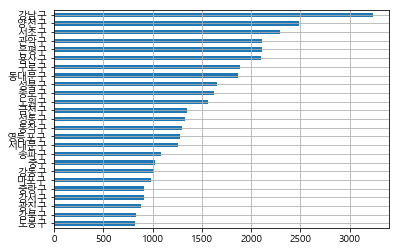

In [10]:
#  인구수 별 그래프
result['소계'].sort_values().plot(kind='barh', grid=True)

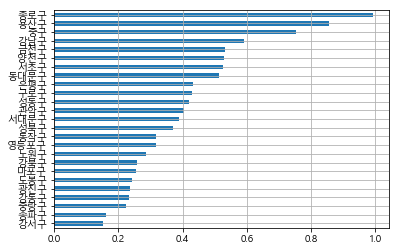

In [11]:
# 인구대비 CCTV 비율 그래프 
#  -  CCTV비율 컬럼을 먼저 추가하고 그 컬럼으로 그래프
result['CCTV비율'] = result['소계']/result['인구수'] * 100
result['CCTV비율'].sort_values().plot(kind='barh', grid=True)

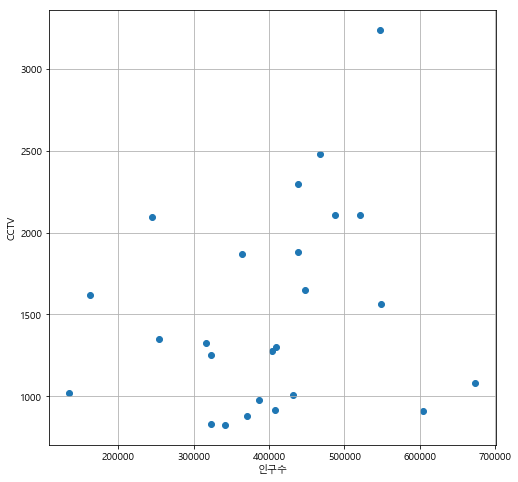

In [12]:
# 인구수와 CCTV 수를 그래프로 나타내려면 -> 이변량 -> scatter
plt.figure(figsize=(8,8))
plt.scatter(result['인구수'], result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

---
여기까지만 하자
---

In [13]:
# [이해]  Numpy의 polyfit과 poly1d
# [참고] https://pinkwink.kr/1127 : 파이썬으로 데이터 주무르기 저자의 사이트

"""
# (1) 단순직선
t = np.arange(0, 10, 0.01)
y = 3*t + 5

plt.figure(figsize=(12,8))
plt.plot(t, y)
"""

"""
# (2) 직선을 중심으로 변형
y_noise = y + np.random.randn(len(y))

plt.figure(figsize=(12,8))
plt.plot(t, y_noise)
"""

"""
# (3) 위의 상태가 실데이타라서 중심을 되는 직선을 찾고 싶다면
#   (3-1) 기울기와 절편을 구한다 : y = 기울기 * x +  절편
fp1 = np.polyfit(t, y_noise, 1) # 1차수
fp1
#   (3-2) 다항식 코드를 사용하기 위해 poly1d 클래스를 이용하여 함수를 만들어야 한다
f1 = np.poly1d(fp1)
f1

plt.plot(t, y_noise, label='noise', color='y')
plt.plot(t, f1(t), lw=2, color='r', label='polyfit')
plt.grid()
plt.legend()
"""

"\n# (3) 위의 상태가 실데이타라서 중심을 되는 직선을 찾고 싶다면\n#   (3-1) 기울기와 절편을 구한다 : y = 기울기 * x +  절편\nfp1 = np.polyfit(t, y_noise, 1) # 1차수\nfp1\n#   (3-2) 다항식 코드를 사용하기 위해 poly1d 클래스를 이용하여 함수를 만들어야 한다\nf1 = np.poly1d(fp1)\nf1\n\nplt.plot(t, y_noise, label='noise', color='y')\nplt.plot(t, f1(t), lw=2, color='r', label='polyfit')\nplt.grid()\nplt.legend()\n"

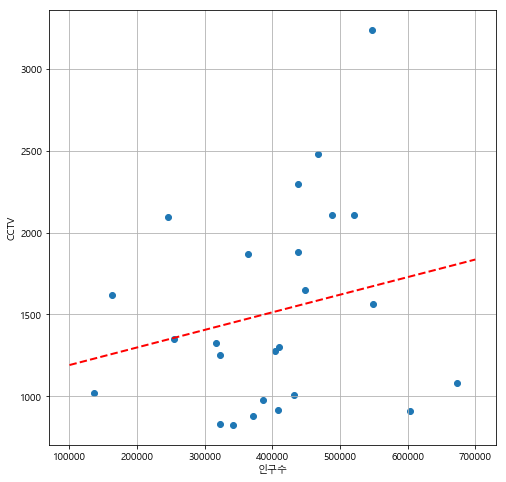

In [14]:
# 기준선(?) 표시하려면 -> 하지말자

lx = np.linspace(100000, 700000, 100)
pf = np.polyfit(result['인구수'],result['소계'], 1)  # 1차수
pf
f1 = np.poly1d(pf)
f1

plt.figure(figsize=(8,8))
plt.scatter(result['인구수'], result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.plot(lx, f1(lx), ls='dashed', lw=2, color='r')

[ 그래프 분석 ] 이 그래프를 보고

인구수 400000명당 1500대의 CCTV는 갖춰여야 한다는 것을 보여주고 싶다면

이 직선과 먼 부분을 다른색으로 표시한다

[참고] 다른 색으로 변경하고자 한다면
https://frhyme.github.io/python-lib/matplotlib_extracting_color_from_cmap/

,소계,3년간증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,차이값
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020,0.591466,1566.538319
양천구,2482,34.671731,468145,464185,3960,58045,0.845892,12.398936,0.530178,895.665104
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241,0.150925,820.739963
용산구,2096,53.216374,245090,228999,16091,37640,6.565343,15.357624,0.855196,749.085528
서초구,2297,63.371266,438163,433951,4212,54751,0.961286,12.495578,0.524234,742.846867


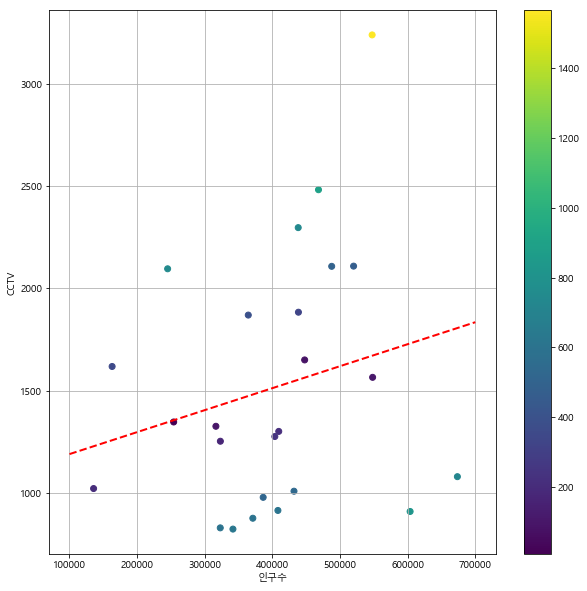

In [15]:
# 기준되는 선과의 차이값을 추가
result['차이값'] = result['소계']- f1(result['인구수'])
result['차이값']

result['차이값'] = np.abs( result['소계']- f1(result['인구수']) )
result['차이값']


plt.figure(figsize=(10,10))
plt.scatter(result['인구수'], result['소계'], c=result['차이값'])
plt.colorbar()
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.plot(lx, f1(lx), ls='dashed', lw=2, color='r')

# 차이가 많이 나는 10지역을 표시하려면?
# 우선 차이값으로 정렬을 해야 한다
df_sort = result.sort_values(by='차이값', ascending=False)
df_sort.head()


[ 그래프 분석결과 ]

강남구, 양천구, 서초구, 용산구는 CCTV가 많이 설치된 곳이다.

송파구, 강서구는 CCTV가 적게 설치된 곳이다.